# Գինու որակի կլասիֆիկացիա

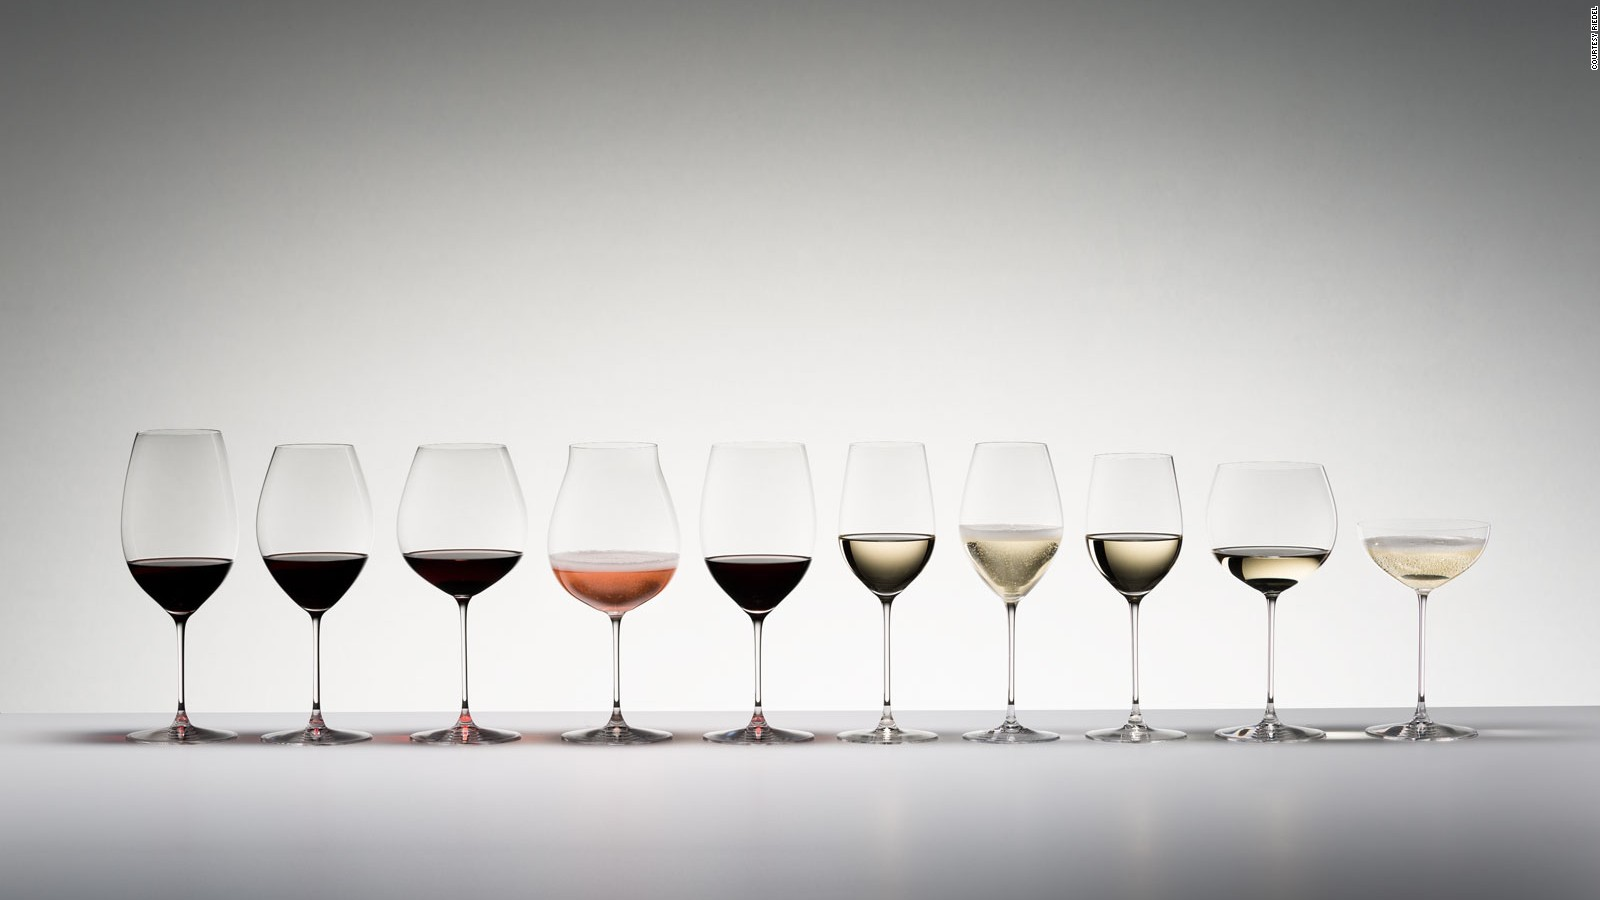

## Ներմուծենք անհրաժեշտ գրադարանները

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT (1).csv


## Բացենք տվյալները

In [ ]:
df = pd.read_csv(open('WineQT.csv', 'rb'))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## Կատարենք տվյալների մաքրում և վերլուծություն

In [ ]:
import pandas as pd

duplicate_rows = df.duplicated().sum()
print(f"Կրկնվող տողերի քանակը: {duplicate_rows}")

empty_rows = df.isnull().sum().sum()
print(f"Դատարկ արժեքներով տողերի քանակը: {empty_rows}")

if duplicate_rows > 0:
    print("Նախազգուշացում: Կան կրկնվող տողեր տվյալների մեջ։")
if empty_rows > 0:
    print("Նախազգուշացում: Կան դատարկ բջիջներ տվյալների մեջ։")
else:
    print("Տվյալները մաքուր են։")


Կրկնվող տողերի քանակը: 0
Դատարկ արժեքներով տողերի քանակը: 0
Տվյալները մաքուր են։


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.describe()   # վիճակագրական վերլուծ․


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


## Բաժանենք տվյալների բազան train-ի և test-ի

In [ ]:
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Decision Tree


Decision TreeClassification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.60      0.90      0.72        97
           6       0.62      0.30      0.41        92
           7       0.33      0.45      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.56       229
   macro avg       0.26      0.27      0.25       229
weighted avg       0.55      0.56      0.52       229

Decision Tree Accuracy: 0.56


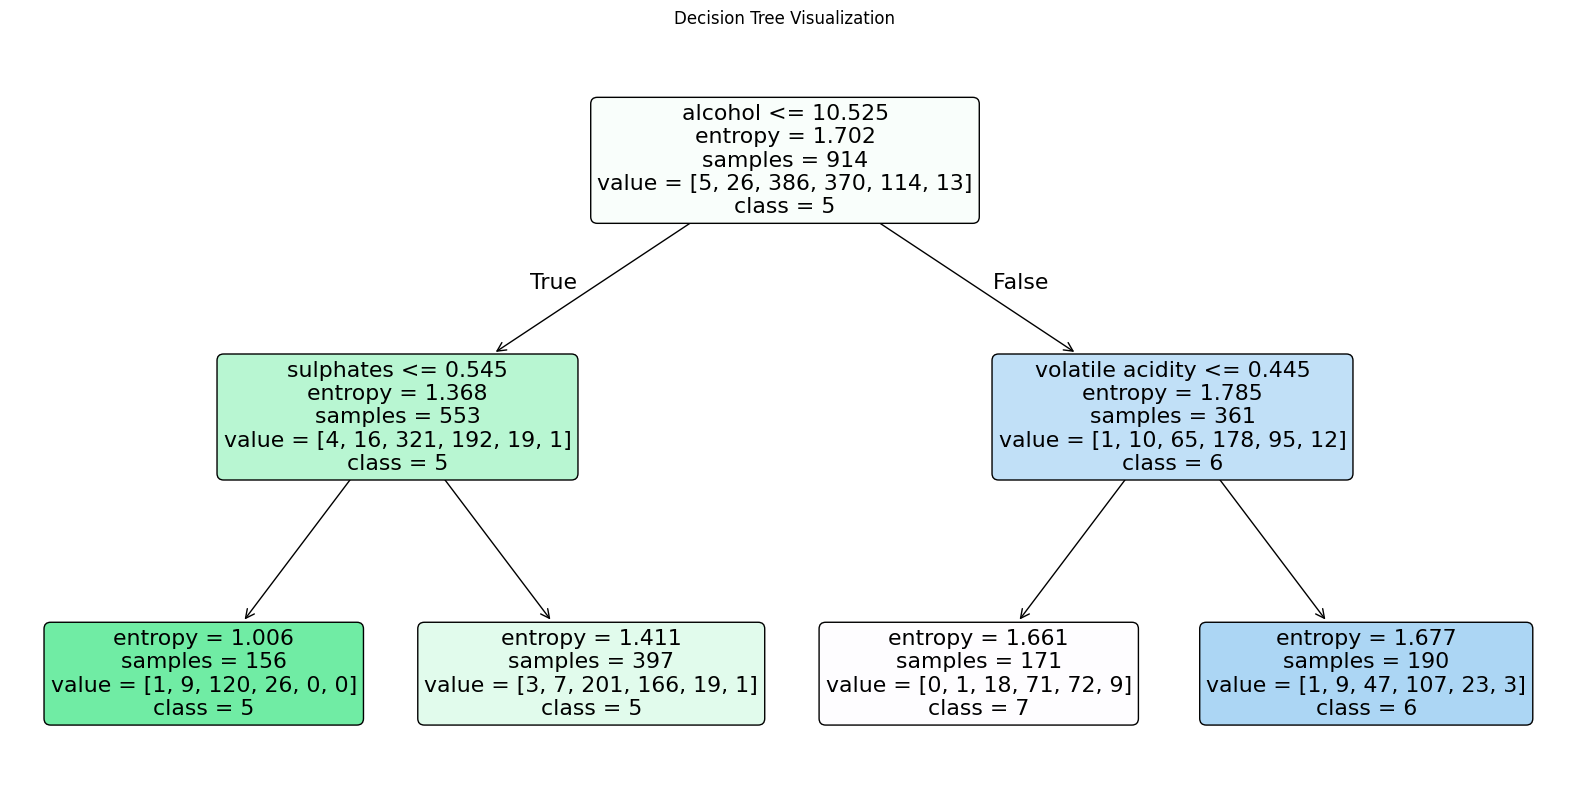

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2)  # Սահմանափակեք խորությունը պարզության համար
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

# gnahatenq modely
print("Decision TreeClassification Report:")
print(metrics.classification_report(y_test, y_pred_dt, zero_division=0))

accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# visual patkerenq
plt.figure(figsize=(20, 10))
class_labels = [str(cls) for cls in sorted(y.unique())]

plot_tree(dt_classifier,
          filled=True,
          feature_names=X.columns,
          class_names=class_labels,
          rounded=True)

plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


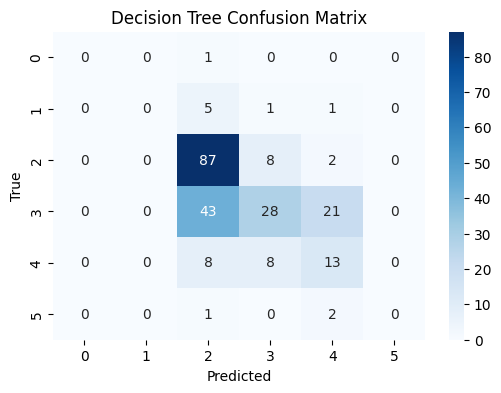

In [ ]:
confusion_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Knn model

In [ ]:
KN = KNeighborsClassifier(weights = 'distance', n_neighbors =5, metric = 'manhattan')
KN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
KN_pred = KN.predict(X_test)

In [ ]:
accuracy_score(y_test,KN_pred)

0.5545851528384279

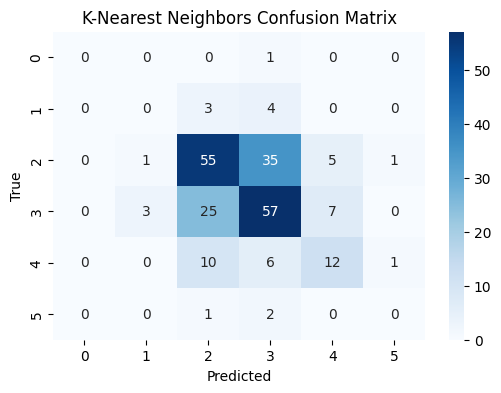

In [ ]:
confusion_kn = confusion_matrix(y_test, KN_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_kn, annot=True, fmt='d', cmap='Blues')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Համեմատենք էս 2 մոդելները

In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.60      0.90      0.72        97
           6       0.62      0.30      0.41        92
           7       0.33      0.45      0.38        29
           8       0.00      0.00      0.00         3

    accuracy                           0.56       229
   macro avg       0.26      0.27      0.25       229
weighted avg       0.55      0.56      0.52       229



In [ ]:
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, KN_pred, zero_division=0))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.59      0.57      0.58        97
           6       0.54      0.62      0.58        92
           7       0.50      0.41      0.45        29
           8       0.00      0.00      0.00         3

    accuracy                           0.54       229
   macro avg       0.27      0.27      0.27       229
weighted avg       0.53      0.54      0.53       229



## Նոր մոդել - SVC

In [ ]:
from sklearn.svm import SVC
svc =SVC(kernel = 'rbf', gamma = 'scale', C = 10)


In [ ]:
svc.fit(X_train, y_train)


SVC(C=10)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
accuracy_score(y_test,svc_pred)

0.49344978165938863